In [1]:
#conda install geopandas

In [2]:
#conda install descartes

In [3]:
#pip install pyshp

In [4]:
#conda install geoplot -c conda-forge

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shapefile as shp
import plotly.express as px


In [6]:
sns.set(style="whitegrid",palette='pastel',color_codes=True)
sns.mpl.rc('figure',figsize=(10,6))

In [7]:
%matplotlib inline

# Preprocessing of Customer Data

In [8]:
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')

In [9]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [10]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [11]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Left join customers onto orders by `customer_id`, and then left join again by `order_id`

In [12]:
df = df_customers.merge(df_orders, on='customer_id').merge(df_items, on='order_id').merge(df_products, on='product_id').merge(df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                  2994
order_delivered_carrier_date     184517
order_delivered_customer_date    353441
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name            240554
product_name_lenght              240554
product_description_lenght       240554
product_photos_qty               240554
product_weight_g                   3502
product_length_cm                  3502
product_height_cm                  3502


In [13]:
df.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

Convert `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` to datetimes

In [14]:
datetime_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in datetime_cols:
    df[col] = df[col].astype('datetime64[ns]')

Convert `order_status`, `product_category_name` to categorical

In [15]:
categorical_cols = ['order_status', 'product_category_name']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [16]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,14409,-20.515413,-47.398194,franca,SP


# How long does it take for an order to be delivered?

In [17]:
df['order_time_taken'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [18]:
df['order_time_taken'].describe()

count    1.684244e+07
mean     1.176709e+01
std      9.113496e+00
min      0.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.500000e+01
max      2.090000e+02
Name: order_time_taken, dtype: float64

<AxesSubplot:xlabel='order_time_taken'>

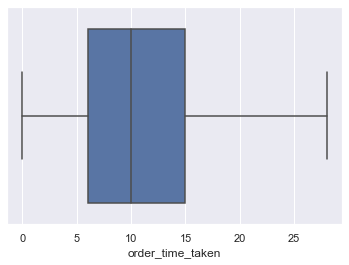

In [19]:
sns.set(font_scale=1)
sns.boxplot(x='order_time_taken', data=df, showfliers=False)

Let's see which order took 3 months to ship

In [20]:
df[df['order_time_taken'] > 180]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_time_taken
2609123,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.779282,-47.176836,paulinia,SP,189.0
2609124,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.793428,-47.188029,paulinia,SP,189.0
2609125,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.781090,-47.176759,paulinia,SP,189.0
2609126,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.777632,-47.167728,paulinia,SP,189.0
2609127,65b14237885b3972ebec28c0f7dd2220,78d26ae26b5bb9cb398edc7384d3c15f,13142,paulinia,SP,2fe324febf907e3ea3f2aa9650869fa5,delivered,2017-03-13 20:17:10,2017-03-13 20:17:10,2017-03-17 07:23:53,...,400.0,36.0,15.0,36.0,13142,-22.788341,-47.190601,paulinia,SP,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582197,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.910348,-37.672944,lagarto,SE,194.0
16582198,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.936340,-37.670311,lagarto,SE,194.0
16582199,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.919704,-37.669508,lagarto,SE,194.0
16582200,9cf2c3fa2632cee748e1a59ca9d09b21,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,285ab9426d6982034523a855f55a885e,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,...,3100.0,38.0,99.0,14.0,49400,-10.915748,-37.668658,lagarto,SE,194.0


<AxesSubplot:xlabel='order_time_taken', ylabel='product_category_name'>

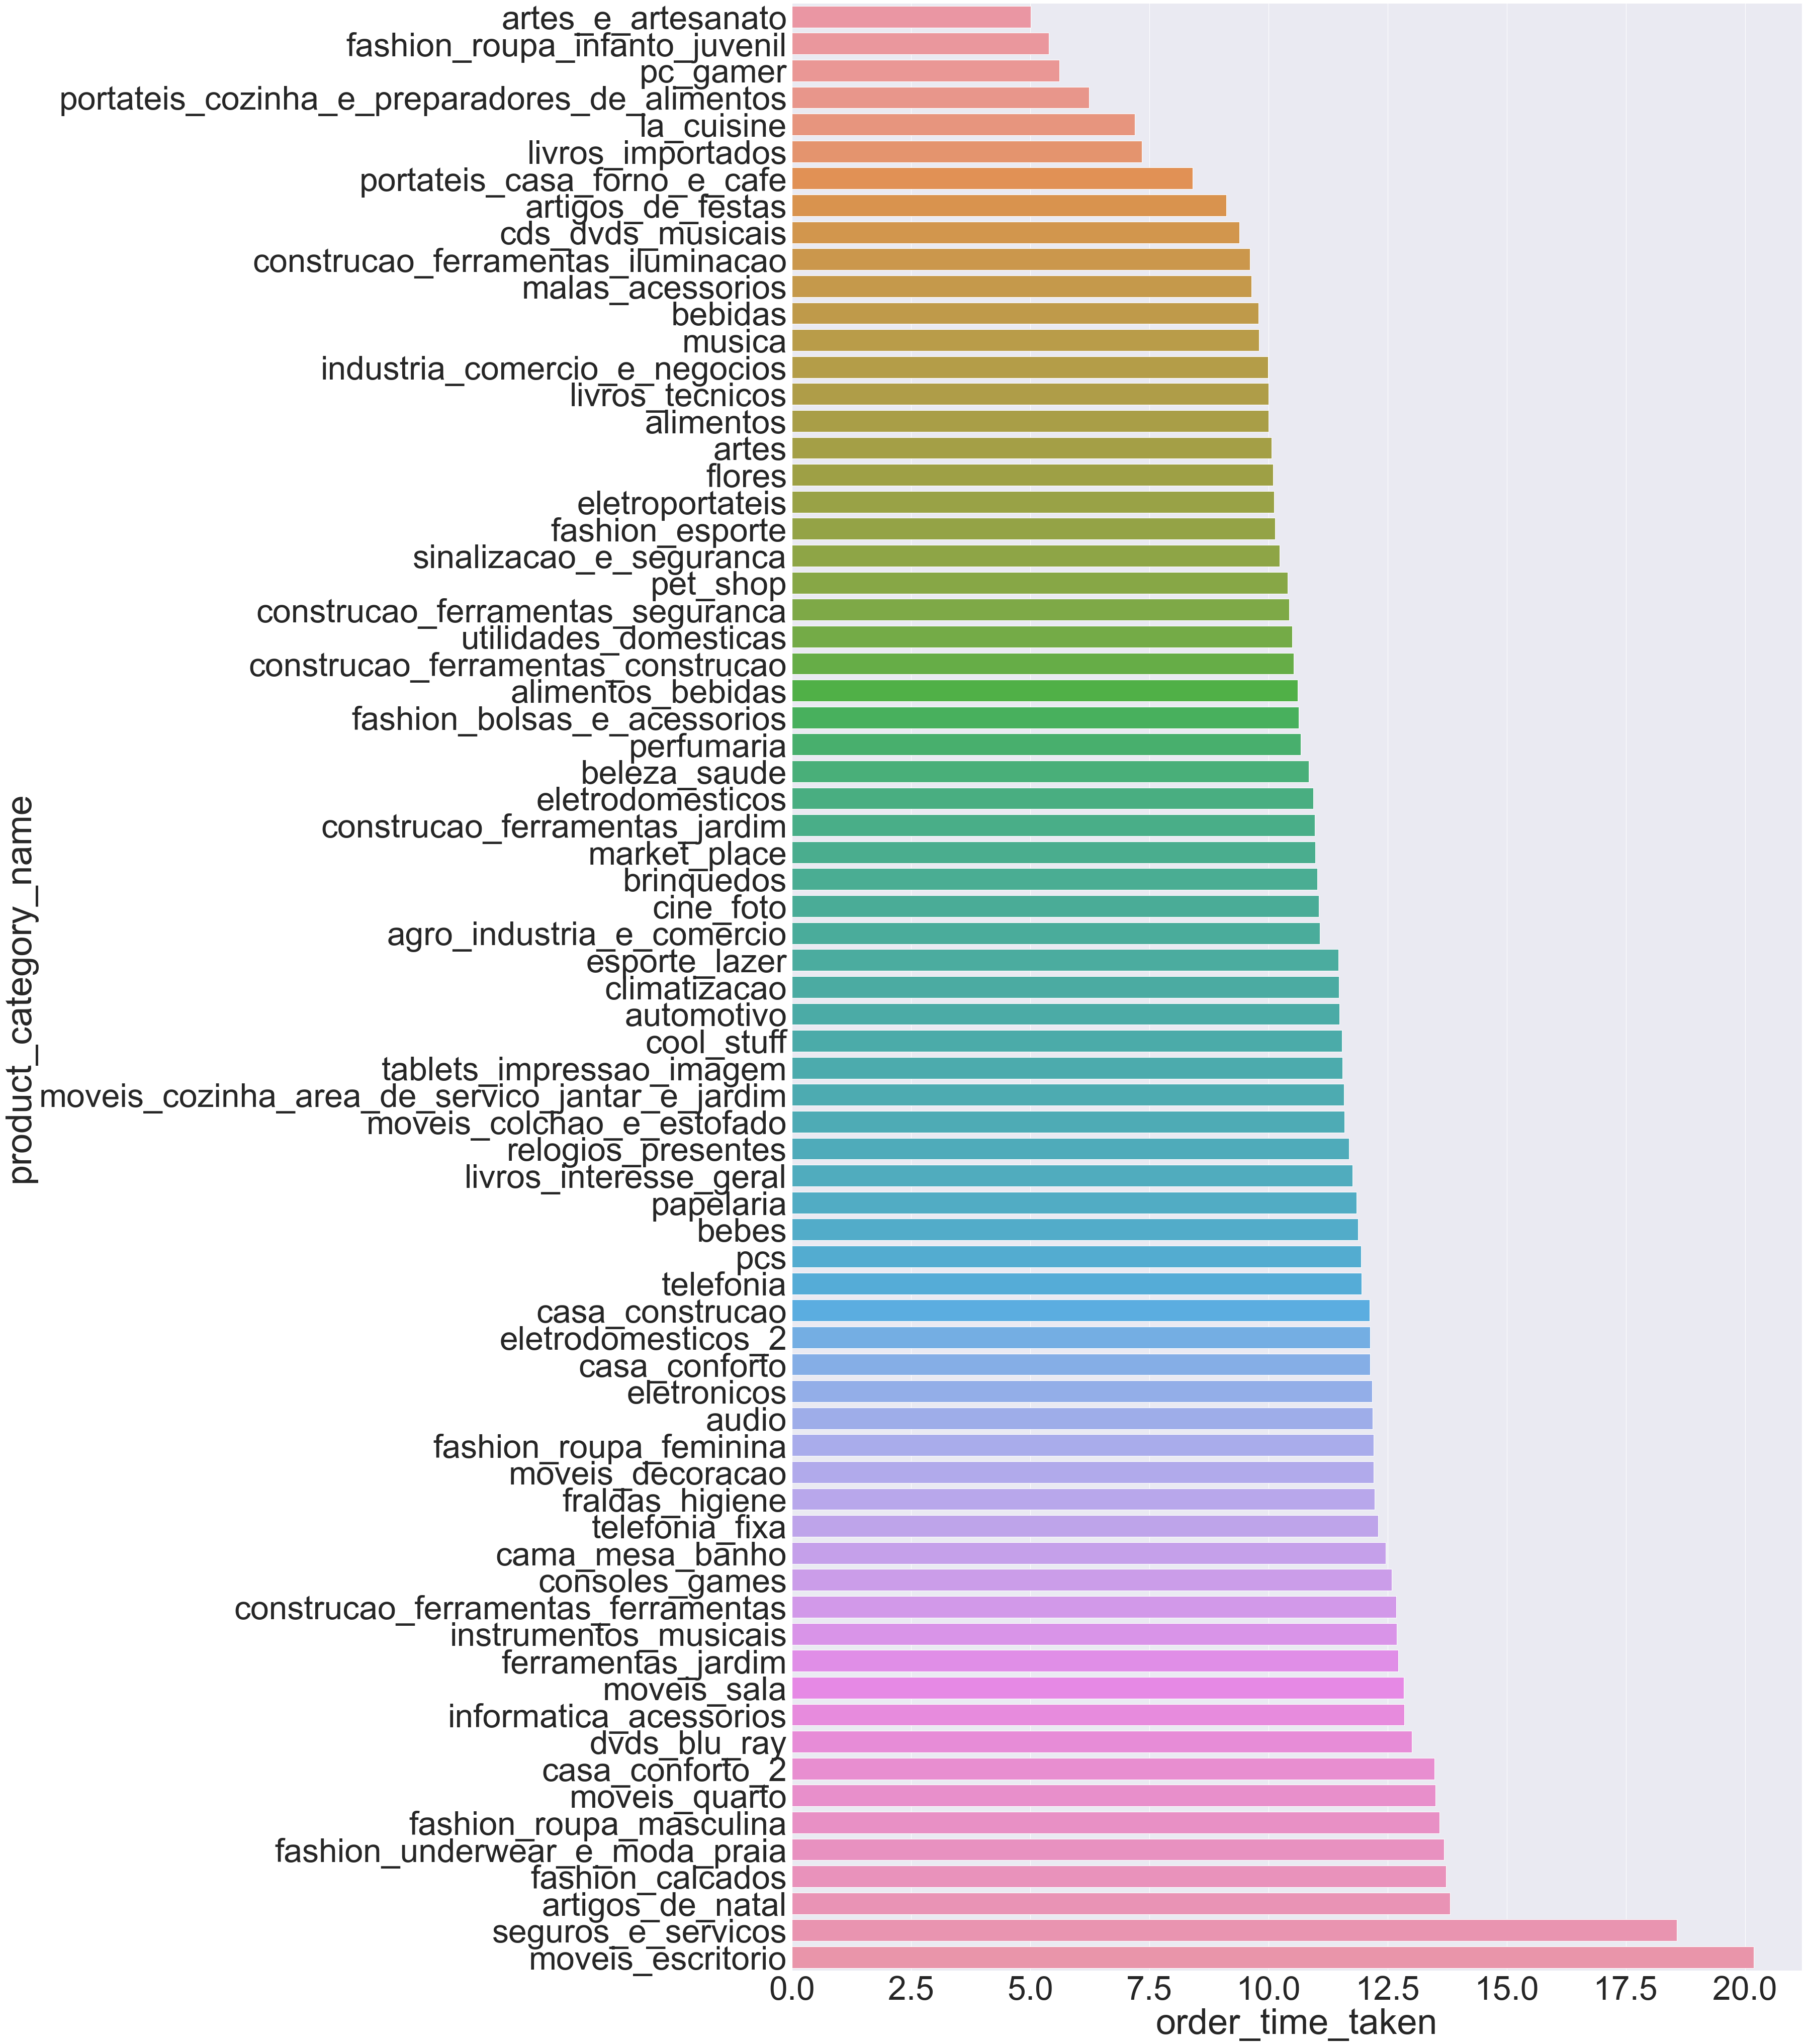

In [21]:
mean_order_time_by_product_category = df.groupby(by=['product_category_name'], as_index=False)[['order_time_taken', 'product_category_name']].mean().sort_values(by='order_time_taken').reset_index(drop=True)
    
sns.set(font_scale=6)
fig, ax = plt.subplots(figsize=(36, 72))
sns.barplot(ax=ax, x='order_time_taken', y='product_category_name', data=mean_order_time_by_product_category, order=mean_order_time_by_product_category['product_category_name'])

<AxesSubplot:xlabel='order_time_taken', ylabel='product_category_name'>

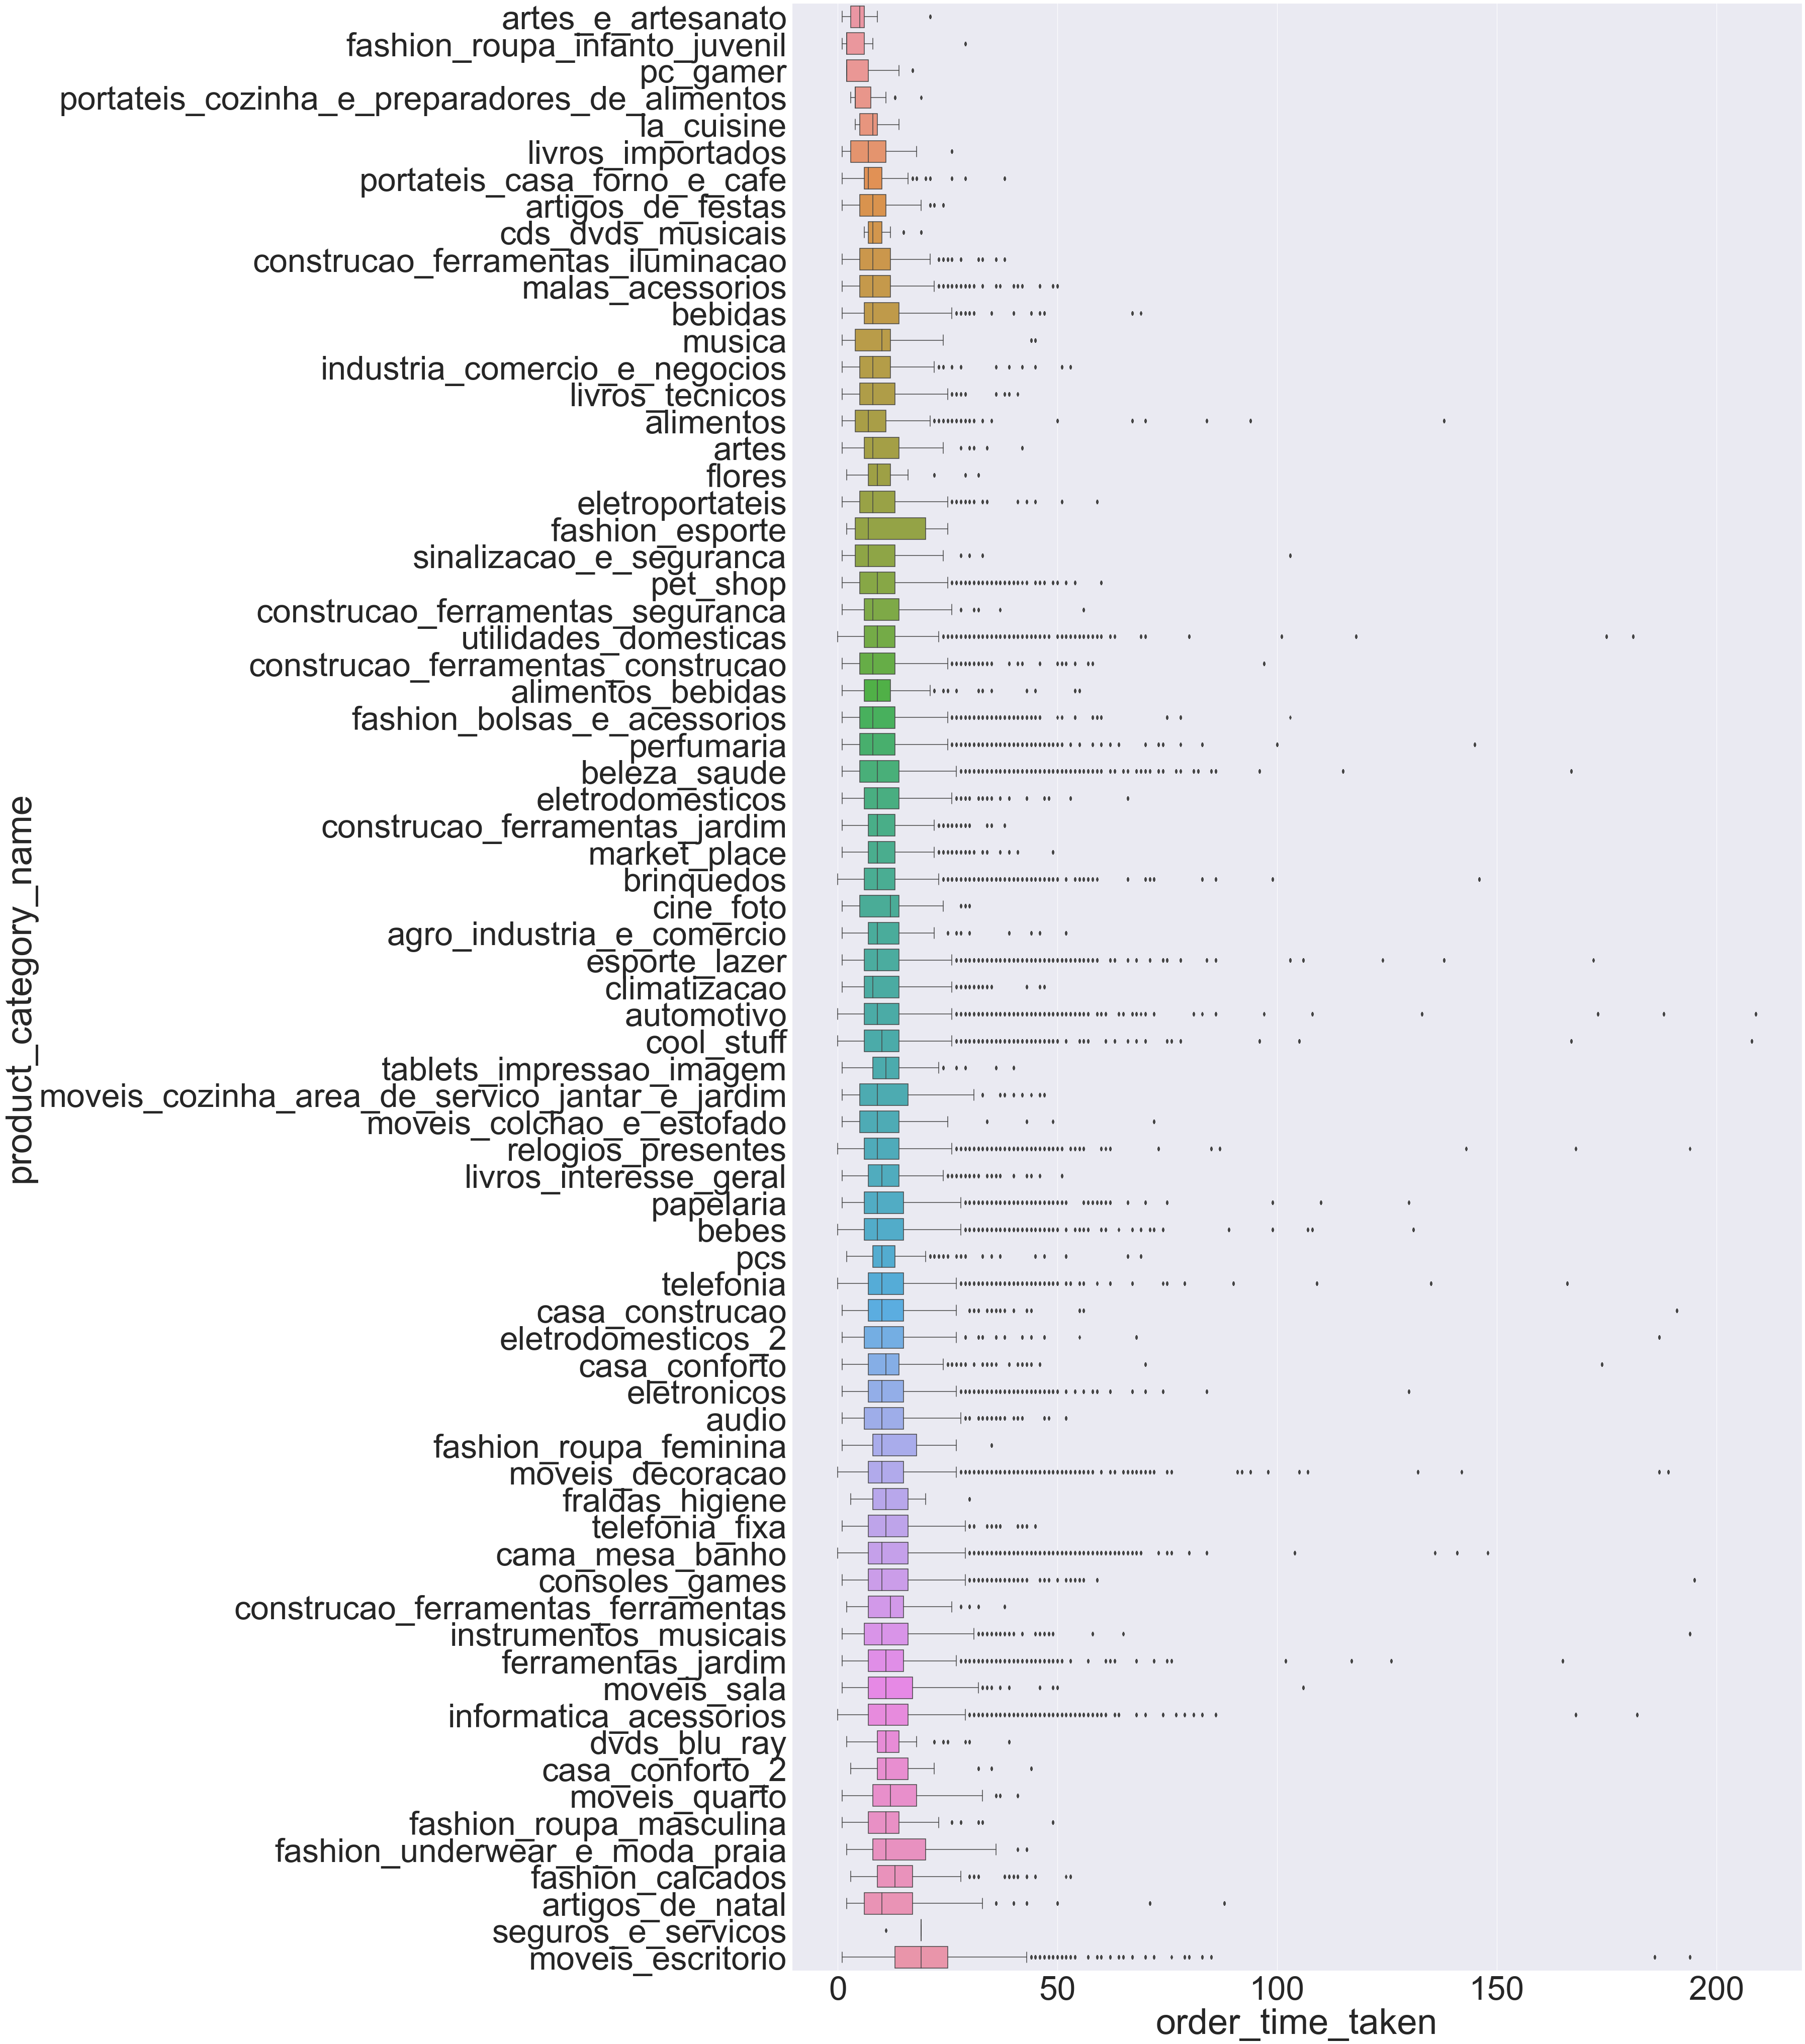

In [22]:
fig, ax = plt.subplots(figsize=(36, 72))
sns.set(font_scale=7)
sns.boxplot(ax=ax, x='order_time_taken', y='product_category_name', data=df, order=mean_order_time_by_product_category['product_category_name'])

In [23]:
mean_order_time_by_product_category

,product_category_name,order_time_taken
0,artes_e_artesanato,5.015826
1,fashion_roupa_infanto_juvenil,5.395933
2,pc_gamer,5.617969
3,portateis_cozinha_e_preparadores_de_alimentos,6.233581
4,la_cuisine,7.199139
...,...,...
68,fashion_underwear_e_moda_praia,13.688369
69,fashion_calcados,13.725983
70,artigos_de_natal,13.815654
71,seguros_e_servicos,18.567568


Geographical Information. Is it true that people who live in larger cities/Populations tend to purchase more eCommerce Products?

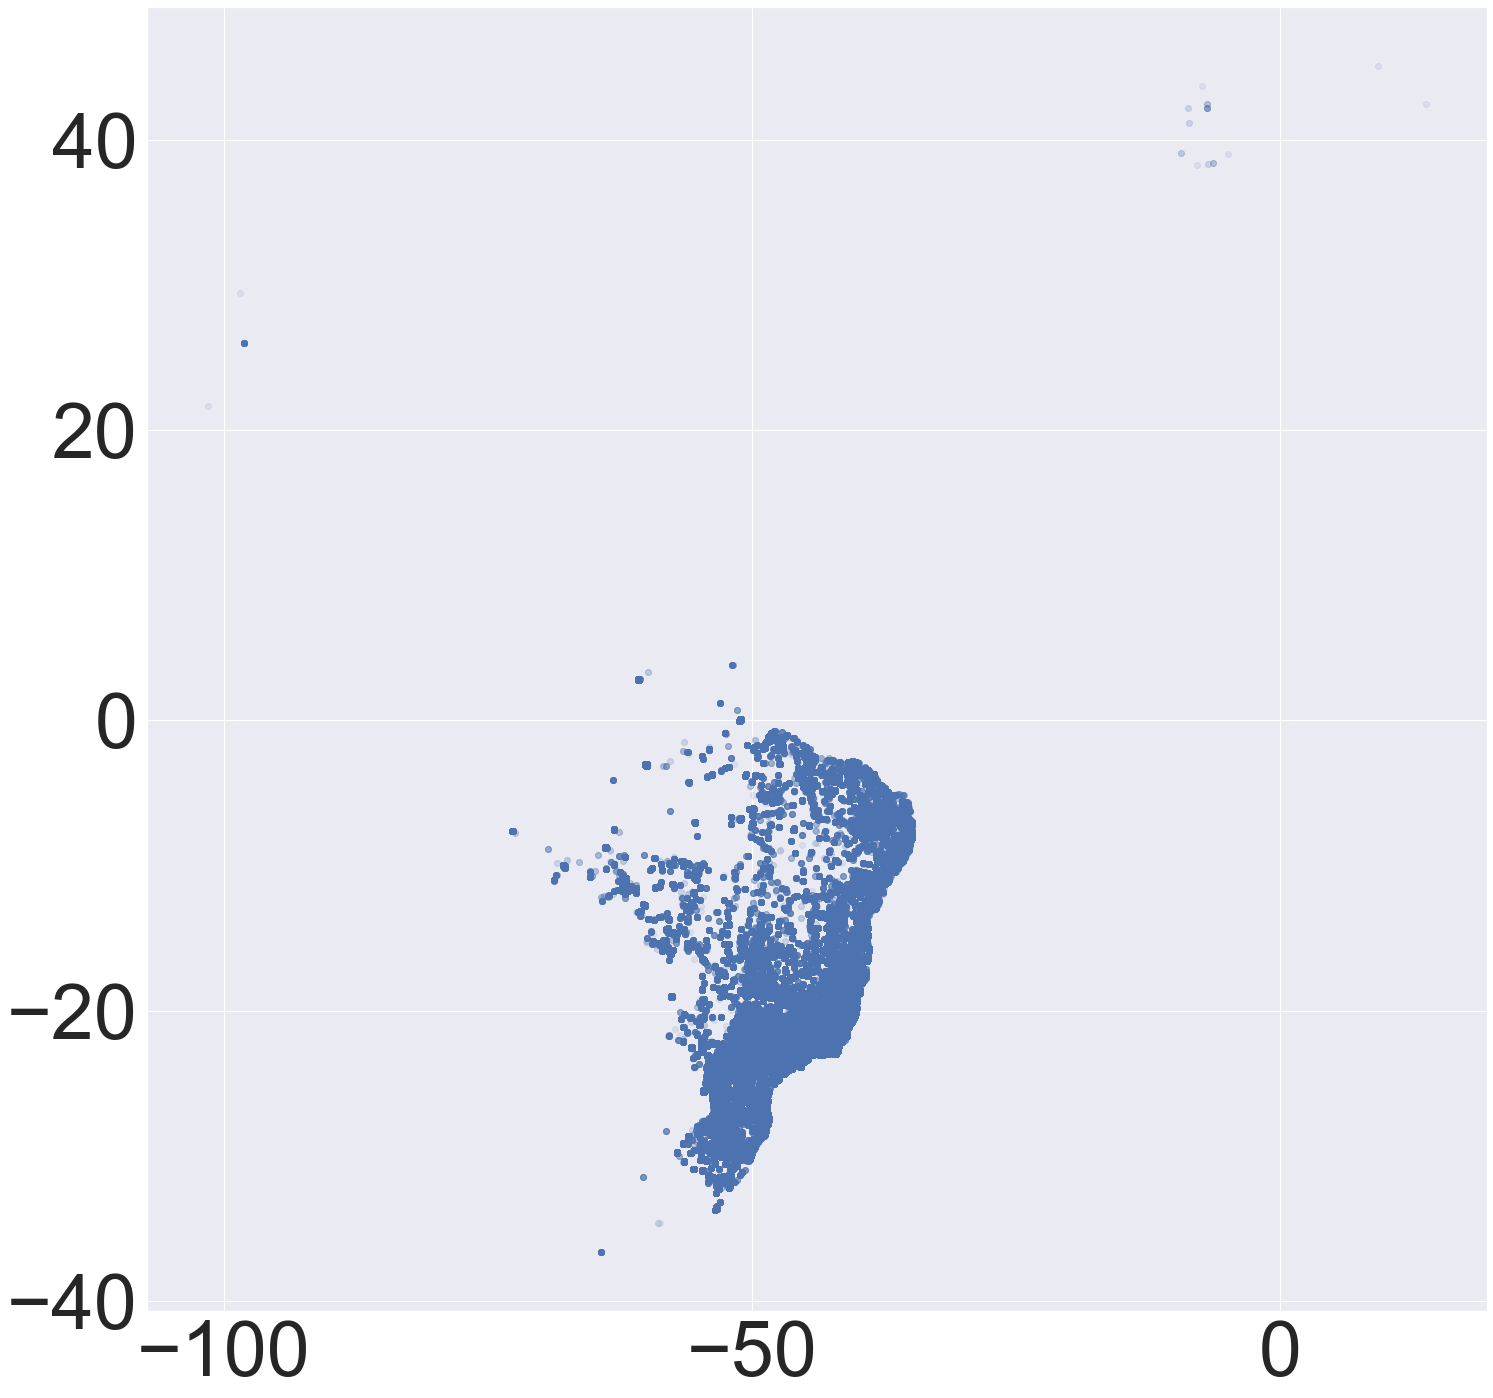

In [24]:
fig, ax = plt.subplots(figsize=(24, 24))
sns.set(font_scale=7)
ax.scatter( df['geolocation_lng'],df['geolocation_lat'], alpha=0.1)



In [25]:
# import plotly.express as px
# dataf= px.data.gapminder().query("year==2007")
# fig = px.scatter_geo(dataf,locations="iso_alpha",color = "continent", 
#                      hover_name = "country",size ="pop",projection = "natural earth")
# fig.show()

In [26]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [27]:
world.head(30)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [28]:
brazil = world[world.name == "Brazil"]

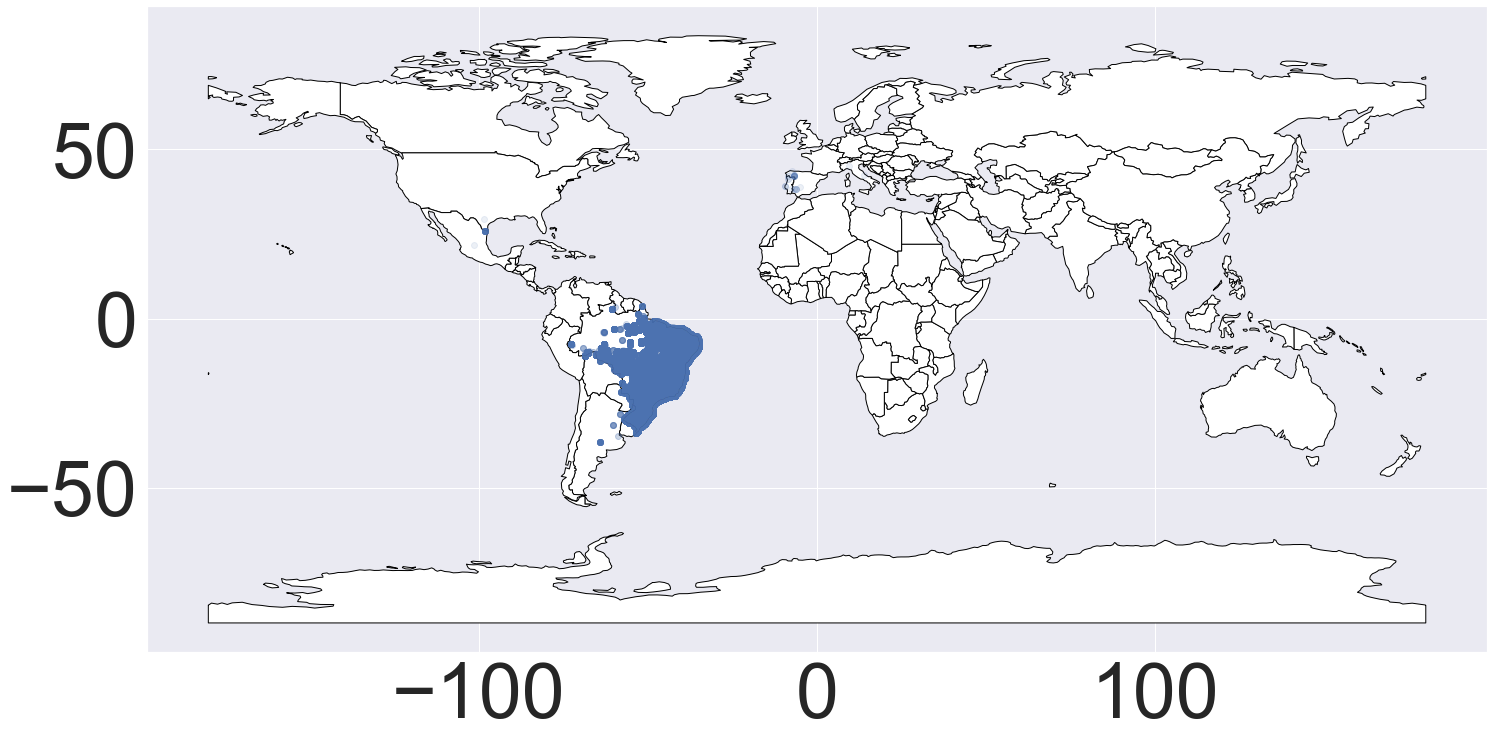

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 24))

world.plot(ax=ax, color='white',edgecolor='black')

ax.scatter( df['geolocation_lng'],df['geolocation_lat'], alpha=0.1)

plt.show()

We can see that most of the purchases of Ecommerce that our data has collected are mostly from Brazil.

In [30]:
import plotly as plt
import plotly.express as px
import json
from urllib.request import urlopen
import pandas as pd

In [31]:
lat = df['geolocation_lat']
lat.head()

0   -20.509897
1   -20.497396
2   -20.510459
3   -20.480940
4   -20.515413
Name: geolocation_lat, dtype: float64

In [32]:
lng = df['geolocation_lng']
lng.head()

0   -47.397866
1   -47.399241
2   -47.399553
3   -47.394161
4   -47.398194
Name: geolocation_lng, dtype: float64

In [33]:
city = df['geolocation_city']
city.describe()

count           17195881
unique              5801
top       rio de janeiro
freq             2185517
Name: geolocation_city, dtype: object

In [34]:
state = df['geolocation_state']
state.describe()

count     17195881
unique          27
top             SP
freq       6396807
Name: geolocation_state, dtype: object

In [35]:
geolocation = pd.concat([state,city,lng,lat],axis = 1).reindex(state.index)
geolocation.head()

,geolocation_state,geolocation_city,geolocation_lng,geolocation_lat
0,SP,franca,-47.397866,-20.509897
1,SP,franca,-47.399241,-20.497396
2,SP,franca,-47.399553,-20.510459
3,SP,franca,-47.394161,-20.480940
4,SP,franca,-47.398194,-20.515413


In [36]:
print(geolocation)

         geolocation_state geolocation_city  geolocation_lng  geolocation_lat
0                       SP           franca       -47.397866       -20.509897
1                       SP           franca       -47.399241       -20.497396
2                       SP           franca       -47.399553       -20.510459
3                       SP           franca       -47.394161       -20.480940
4                       SP           franca       -47.398194       -20.515413
...                    ...              ...              ...              ...
17195876                SP        sao paulo       -46.635971       -23.647765
17195877                SP        sao paulo       -46.636954       -23.647430
17195878                SP        são paulo       -46.636862       -23.647471
17195879                PR         paicandu       -52.150755       -23.501992
17195880                PR         água boa       -52.151097       -23.501620

[17195881 rows x 4 columns]


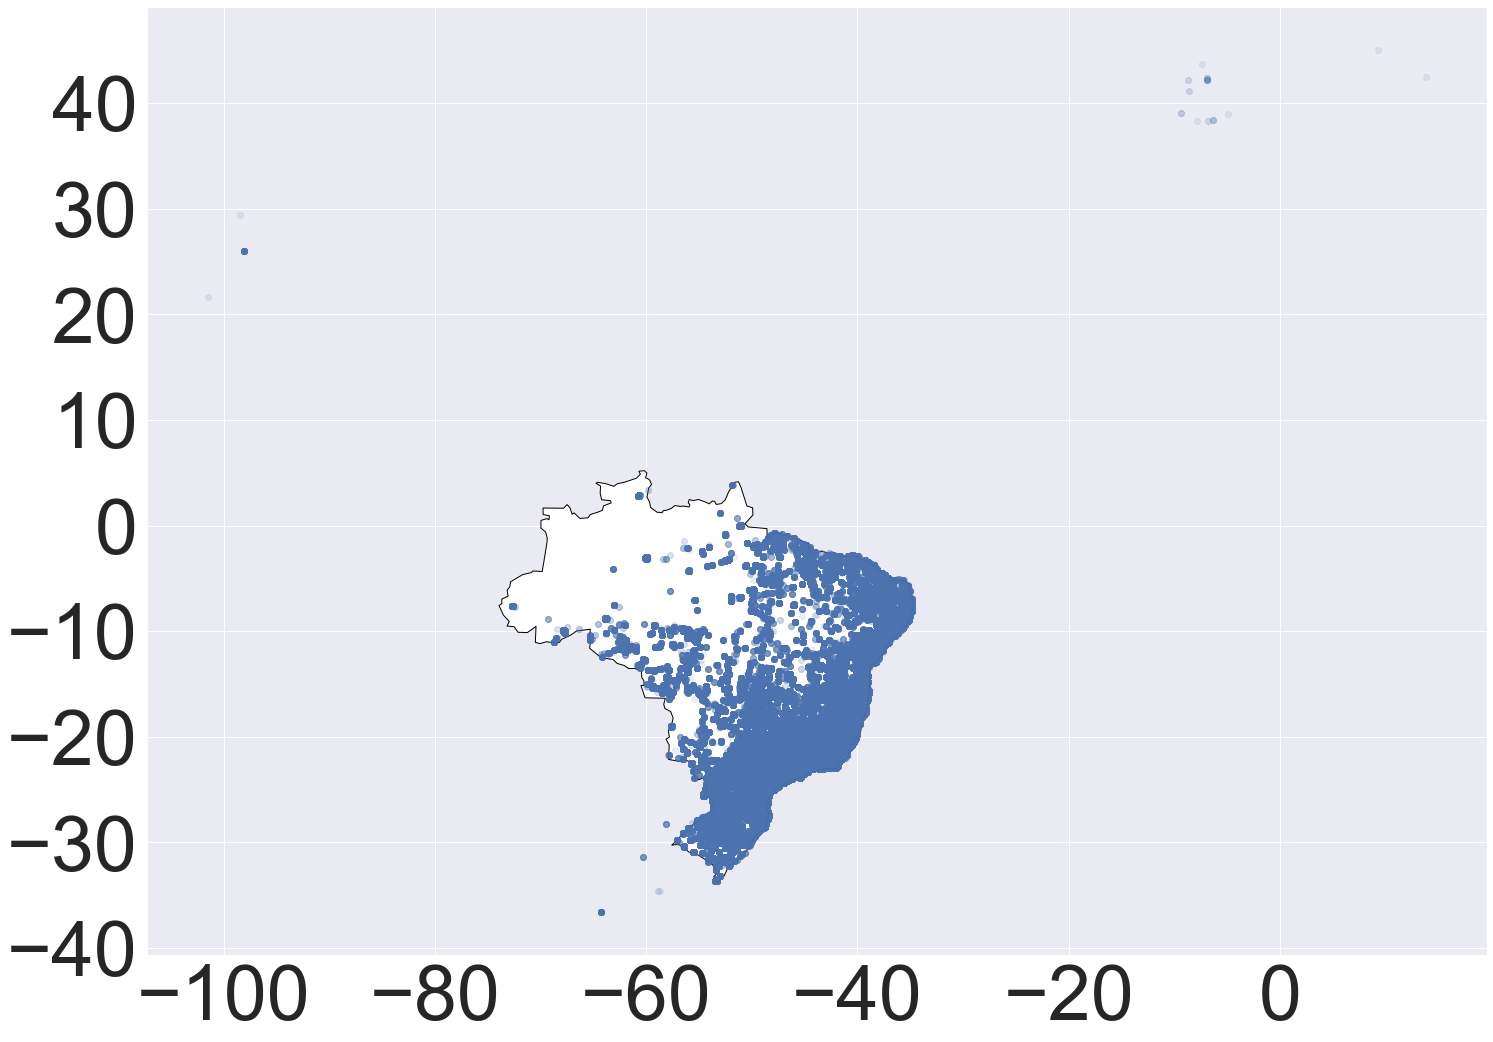

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 24))
sns.set(font_scale=2)

brazil.plot(ax=ax, color='white',edgecolor='black')

ax.scatter( df['geolocation_lng'],df['geolocation_lat'], alpha=0.1)

plt.show()

As you can see from the above mapping, we notice that a large number of Ecommerce occurs 
at the southern and eastern regions of Brazil.Therefore, we decided to dive deeper into finding out the states with the higher number of Ecommerce purchase in Brazil.

In [38]:
import geopandas as gpd

info = gpd.read_file('data/bcim_2016_21_11_2018.gpkg',layer = 'lim_unidade_federacao_a')

info.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [39]:
type(info)

geopandas.geodataframe.GeoDataFrame

In [40]:
type(info.geometry)

geopandas.geoseries.GeoSeries

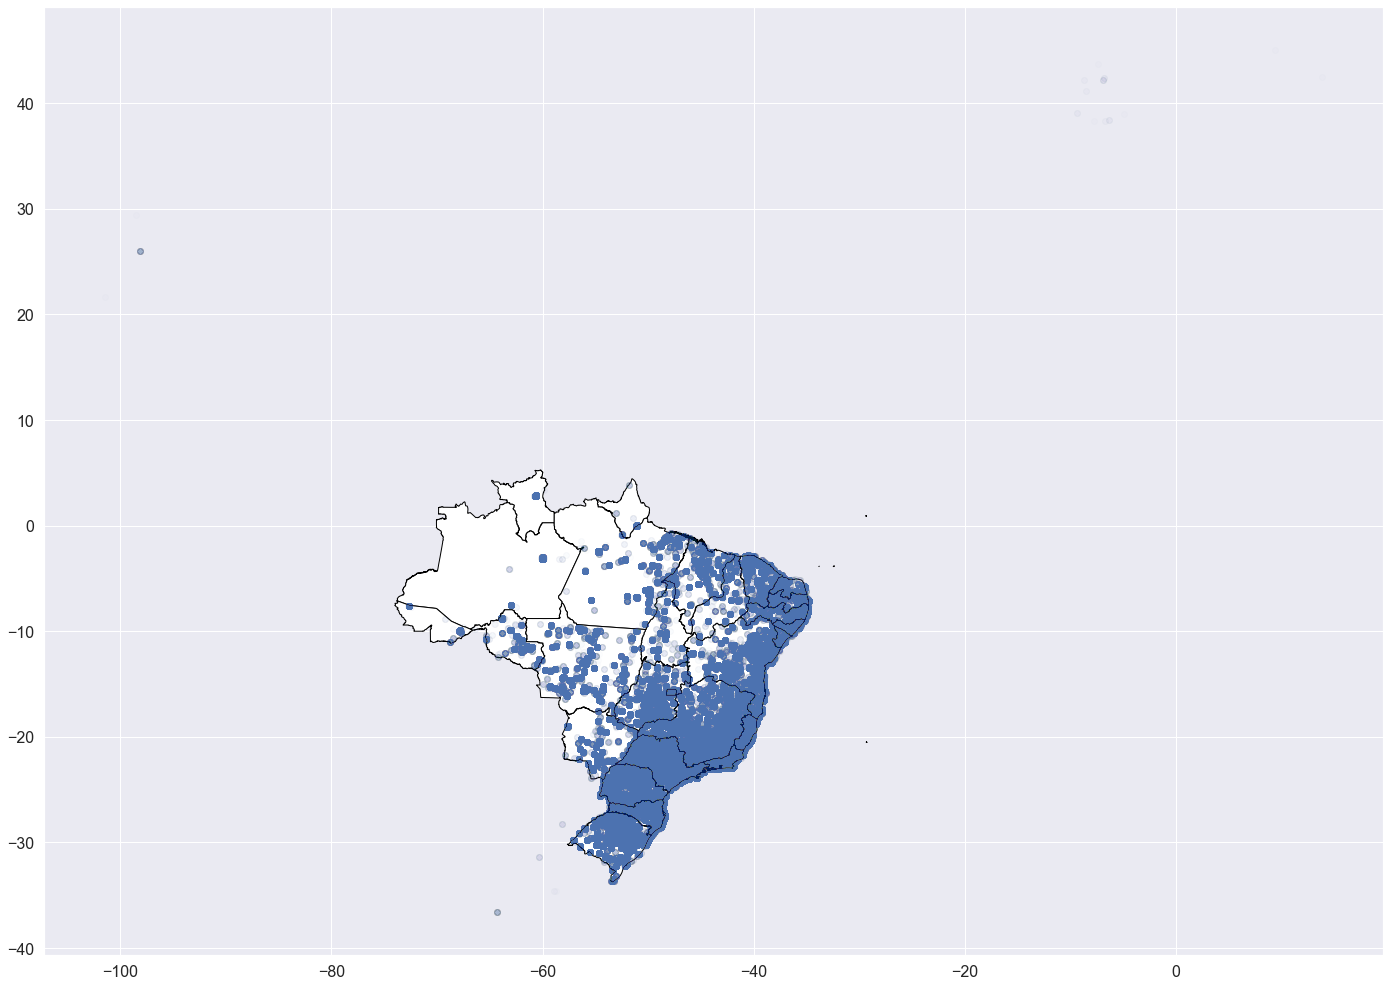

In [41]:

fig, ax = plt.subplots(figsize=(24, 24))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
info.plot(ax=ax, color='white',edgecolor='black')

ax.scatter( df['geolocation_lng'],df['geolocation_lat'], alpha=0.01)

plt.show()

In [42]:
states = np.array(df['geolocation_state'].drop_duplicates())
states

array(['SP', 'PA', 'RS', 'RJ', 'SC', 'MG', 'MT', 'BA', 'ES', 'PR', 'MS',
       'CE', 'MA', 'RN', 'TO', 'RR', 'PB', 'DF', 'GO', 'PE', 'AC', 'PI',
       'RO', 'AL', 'SE', 'AM', 'AP'], dtype=object)

In [43]:
count= {}
for state in df['geolocation_state']:
    if state in count:
        count[state] +=1
    else:
        count[state] = 1
        
print(count)
    

{'SP': 6396807, 'PA': 93342, 'RS': 925129, 'RJ': 3443647, 'SC': 625259, 'MG': 3277695, 'MT': 145417, 'BA': 416850, 'ES': 353706, 'PR': 716308, 'MS': 71107, 'CE': 71497, 'MA': 59755, 'RN': 23212, 'TO': 19888, 'RR': 2411, 'PB': 31573, 'DF': 105419, 'GO': 154963, 'PE': 127671, 'AC': 8332, 'PI': 26490, 'RO': 23767, 'AL': 36573, 'SE': 27214, 'AM': 6267, 'AP': 5582}


The above count attribute to the number of online purchase made in the particular state. As we can see the most number of purchases made was in Sao Paulo.

In [44]:
count_order = sorted(count.items(), key=lambda x:x[1], reverse = True)
for i in count_order:
    print(i[0],i[1])

SP 6396807
RJ 3443647
MG 3277695
RS 925129
PR 716308
SC 625259
BA 416850
ES 353706
GO 154963
MT 145417
PE 127671
DF 105419
PA 93342
CE 71497
MS 71107
MA 59755
AL 36573
PB 31573
SE 27214
PI 26490
RO 23767
RN 23212
TO 19888
AC 8332
AM 6267
AP 5582
RR 2411


In [45]:
unsorted = df.from_dict(data =count ,orient = 'index', dtype= None, columns = None)
unsorted = unsorted.rename(columns = {0:"count"})



In [46]:
sort_data = unsorted.sort_values(by=['count'], ascending = False)
sort_data = sort_data.reset_index()


<AxesSubplot:xlabel='count', ylabel='index'>

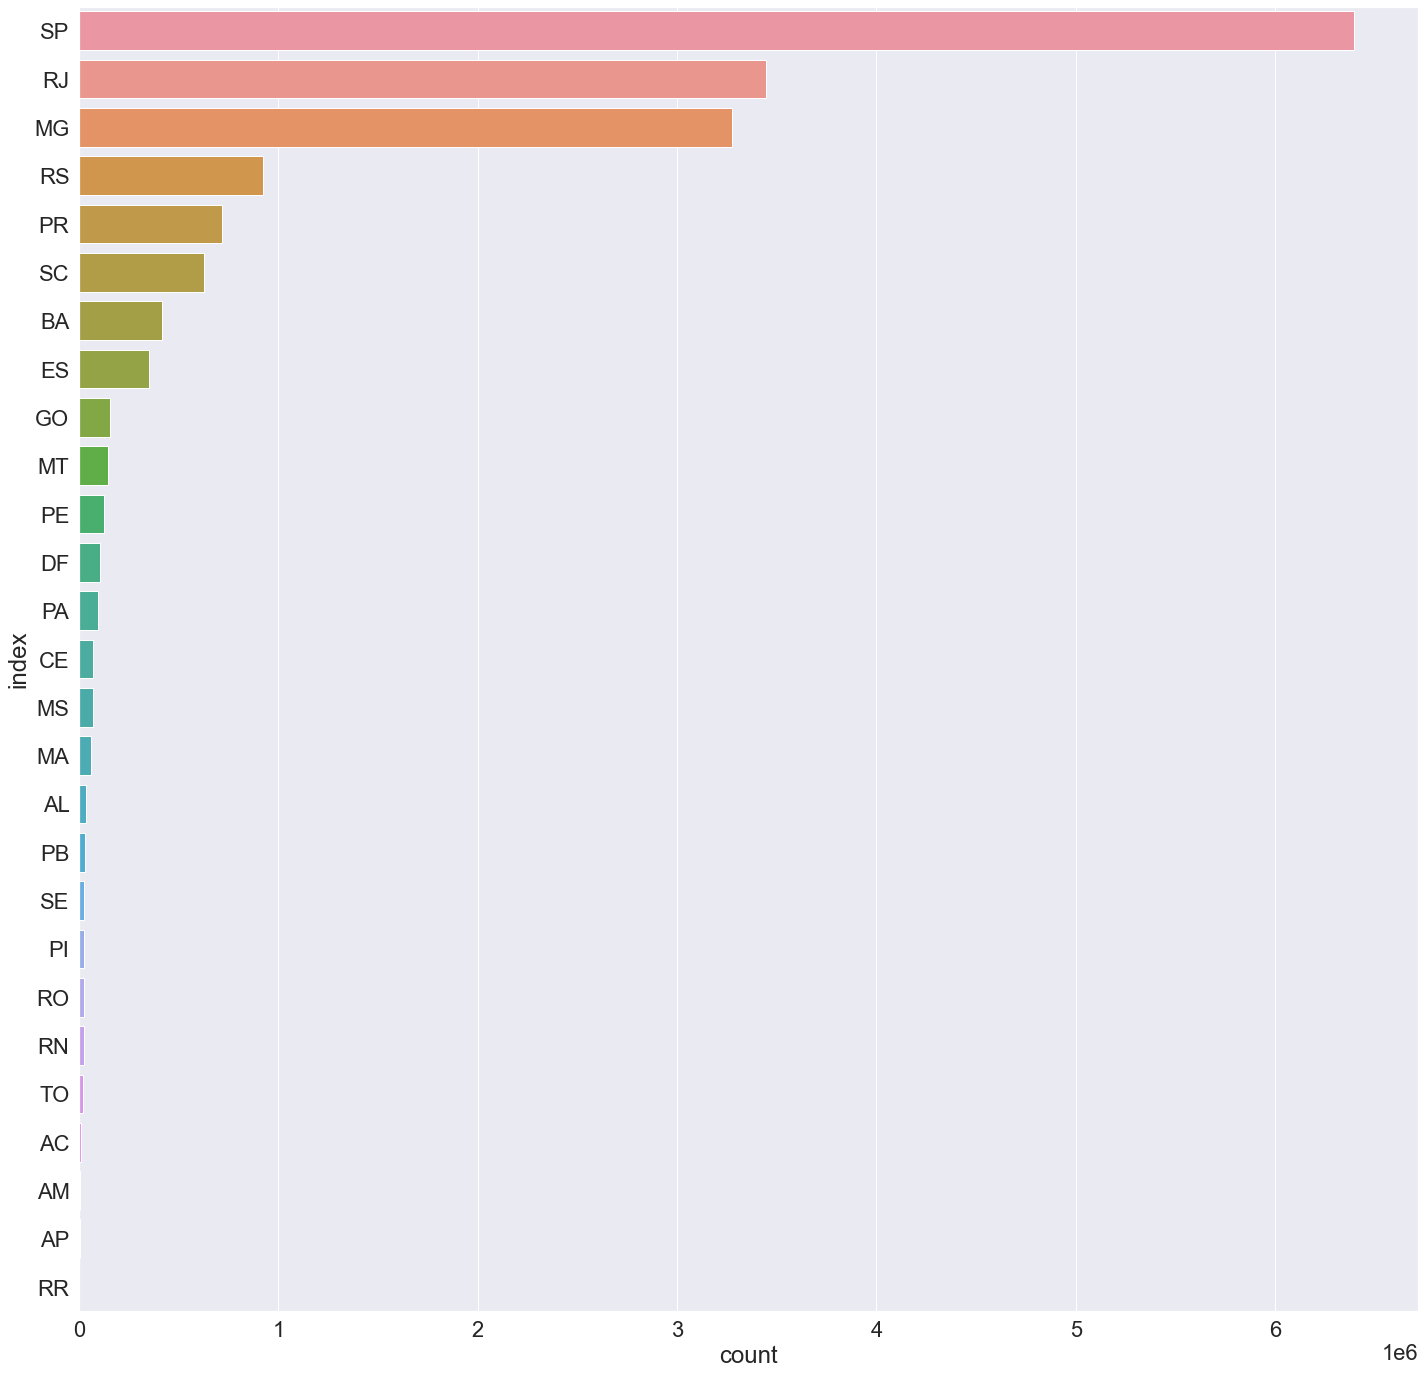

In [47]:
f = plt.figure(figsize = (24,24))
sns.set(font_scale=2)

sns.barplot(y='index', x = 'count', data = sort_data)

From the above barplot, we could tell that there are varying numbers of purchase made in different states of Brazil. The state with the most number of purchase is Sao Paulo with a purchase of 6,396807. 
The state with the lowest number of purchase is Roraima with 2411 purchases. We observe that the Top 3 states with highest purchases are Sao Paulo, Rio de Janeiro and Minas Gerais.

Now we want to find out if the population of the state has lead to this phenomenon of higher purchase. 

In [48]:
populationdata = {'State':['GO','MS','PR','MG','SE','AL','TO','RR','AM',
                          'AC','RO','DF','PI','PB','CE','SC','RJ','AP','PA',
                          'ES','BA','MT','PE','RN','MA','SP','RS'],
                 'Population':[7113540,2809394,11516840,21292666,2318822,3351543,1590248,631181,4207714,
                              894470,1796460,3055149,3281480,4039277,9187103,7252502,17366189,861773,8690745,
                              4064052,14930634,3526220,9616621,3534165,7114598,46289333,11422973]}

populationdata = pd.DataFrame(populationdata)
populationdata

,State,Population
0,GO,7113540
1,MS,2809394
2,PR,11516840
3,MG,21292666
4,SE,2318822
5,AL,3351543
6,TO,1590248
7,RR,631181
8,AM,4207714
9,AC,894470


<AxesSubplot:xlabel='Population', ylabel='State'>

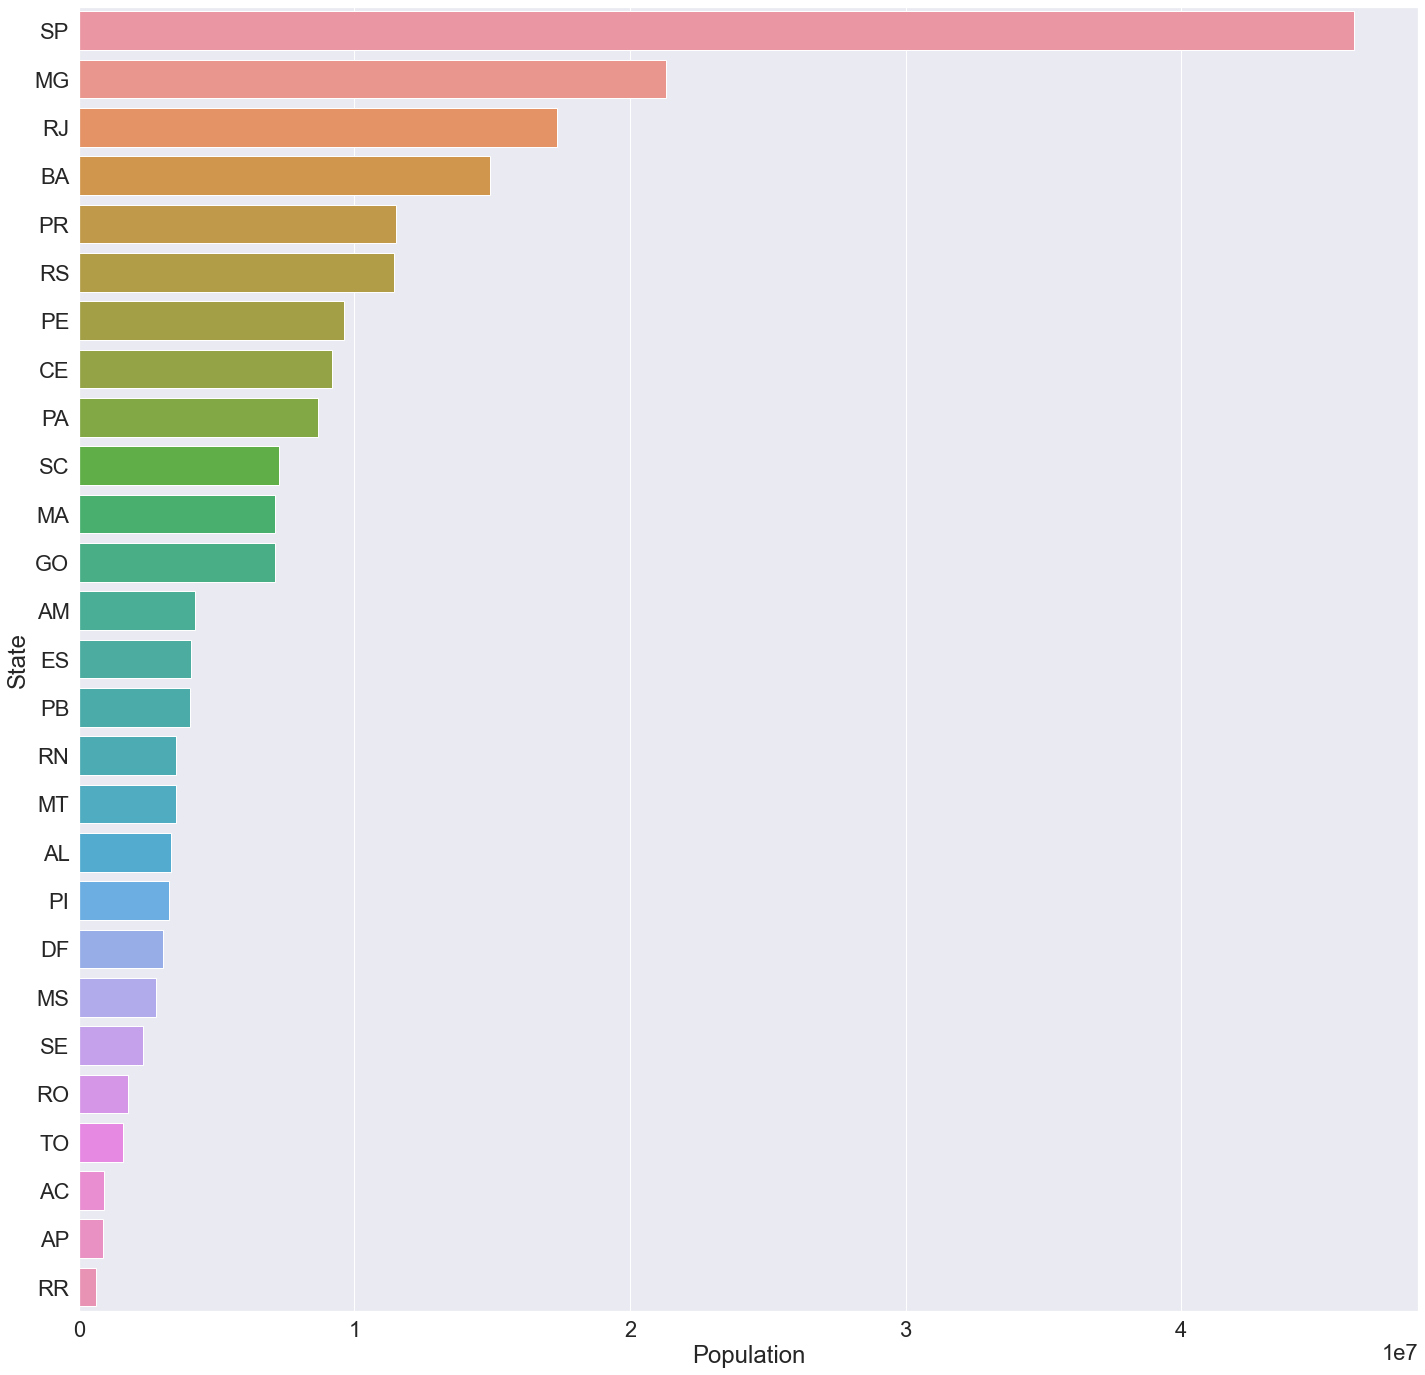

In [49]:
sort_pop = populationdata.sort_values(by=['Population'], ascending = False)
sort_pop = sort_pop.reset_index()

f = plt.figure(figsize = (24,24))
sns.set(font_scale=2)
sns.barplot(y = "State", data = sort_pop, x = "Population")

As we plot our population data in each States of Brazil, we realised that Sao Paulo, Minas Gerais and Rio de Janeiro are still in the top 3 in population in Brazil. This might show that with higher population in the state it may result in a higher ECommerce purchase made by its people.

In [50]:

geolocation = pd.concat([lng,lat],axis = 1).reindex(lng.index)
geolocation.head()


,geolocation_lng,geolocation_lat
0,-47.397866,-20.509897
1,-47.399241,-20.497396
2,-47.399553,-20.510459
3,-47.394161,-20.480940
4,-47.398194,-20.515413


In [51]:
statesdf1 = pd.DataFrame(states,columns = ['State'])


In [52]:
geog = {"Latitude": [-23.65283405,-1.190019105,-30.88004148,-22.56003253,-27.23003172,-18.78000486,-15.65001504,
                  -16.28000242,-20.85000771,-24.08996499,-22.53000853,-2.89999225,-5.809995505,-5.650005271,
                  -6.319576804,1.816231505,-7.019585756,-15.78334023,-17.73004311,-8.110010153,-9.070003236,
                  -4.820030091,-11.64002724,-9.48000405,-11.26961058,-3.289580873,-0.039598369],
        "Longitude": [-46.52781661,-47.17999903,-55.53000615,-44.1699502,-52.03001306,-42.95002466,-56.14002059,
                   -39.0299797,-41.12998071,-54.2699797,-55.7299681,-40.85002364,-46.14998438,-37.80000309,
                   -47.41998438,-61.12767481,-37.29000838,-47.91605229,-49.10998458,-35.02004358,-68.66997929,
                   -42.18001998,-61.20999536,-35.83996769,-37.45002446,-60.6199797,-51.17998743]
       }


In [53]:
statesdf = pd.DataFrame(geog)
statesdf

,Latitude,Longitude
0,-23.652834,-46.527817
1,-1.190019,-47.179999
2,-30.880041,-55.530006
3,-22.560033,-44.169950
4,-27.230032,-52.030013
5,-18.780005,-42.950025
6,-15.650015,-56.140021
7,-16.280002,-39.029980
8,-20.850008,-41.129981
9,-24.089965,-54.269980


In [54]:
statesdf = pd.concat([statesdf1,statesdf],axis = 1)
# statesdf = statesdf.set_index(['SP','RJ','MG','RS','PR','SC','BA','ES','GO','MT','PE','DF','PA','CE',
#                             'MS','MA','AL','PB','SE','PI','RO','RN','TO','AC','AM','AP','RR'])
# statesdf = statesdf.set_index("State")

statesdf


,State,Latitude,Longitude
0,SP,-23.652834,-46.527817
1,PA,-1.190019,-47.179999
2,RS,-30.880041,-55.530006
3,RJ,-22.560033,-44.169950
4,SC,-27.230032,-52.030013
5,MG,-18.780005,-42.950025
6,MT,-15.650015,-56.140021
7,BA,-16.280002,-39.029980
8,ES,-20.850008,-41.129981
9,PR,-24.089965,-54.269980


In [55]:
count_order = pd.DataFrame(count_order,columns=['State','Count'])
count_order

,State,Count
0,SP,6396807
1,RJ,3443647
2,MG,3277695
3,RS,925129
4,PR,716308
5,SC,625259
6,BA,416850
7,ES,353706
8,GO,154963
9,MT,145417


In [56]:
finalstates= pd.merge(count_order,statesdf,on='State')

finalstates

,State,Count,Latitude,Longitude
0,SP,6396807,-23.652834,-46.527817
1,RJ,3443647,-22.560033,-44.169950
2,MG,3277695,-18.780005,-42.950025
3,RS,925129,-30.880041,-55.530006
4,PR,716308,-24.089965,-54.269980
5,SC,625259,-27.230032,-52.030013
6,BA,416850,-16.280002,-39.029980
7,ES,353706,-20.850008,-41.129981
8,GO,154963,-17.730043,-49.109985
9,MT,145417,-15.650015,-56.140021


In [57]:
INFOS_UFS = gpd.read_file('./data/bcim_2016_21_11_2018.gpkg',layer = 'lim_unidade_federacao_a')

INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [58]:
BRAZILS = {'State_Full_Name': ['GOAIS', 'MATO GROSSO DO SUL', 'PARANÁ', 'MINAS GERAIS','SERGIPE',
                            'ALAGOAS','TOCANTINS','RORAIMA','AMAZONAS','ACRE','RONDÔNIA','DISTRITO FEDERAL',
                            'PIAUÍ','PARAÍBA','CEARÁ','SANTA CATARINA','RIO DE JANEIRO','AMAPÁ','PARÁ',
                            'ESPÍRITO SANTO','BAHIA','MATO GROSSO','PERNAMBUCO','RIO GRANDE DO NORTE',
                             'MARANHÃO','SÃO PAULO','RIO GRANDE DO SUL']}
BRAZILS= pd.DataFrame(BRAZILS)
BRAZILS

,State_Full_Name
0,GOAIS
1,MATO GROSSO DO SUL
2,PARANÁ
3,MINAS GERAIS
4,SERGIPE
5,ALAGOAS
6,TOCANTINS
7,RORAIMA
8,AMAZONAS
9,ACRE


In [59]:
INFOS_UFS.rename({'sigla': 'State'}, axis = 1, inplace= True)
BRAZIL = INFOS_UFS.merge(finalstates, on = 'State')
BRAZIL = pd.concat([BRAZIL,BRAZILS],axis = 1)
BRAZIL1 = BRAZIL[['State','State_Full_Name','Count','geometry']]
BRAZIL1

,State,State_Full_Name,Count,geometry
0,GO,GOAIS,154963,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,MATO GROSSO DO SUL,71107,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,PARANÁ,716308,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,MINAS GERAIS,3277695,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,SERGIPE,27214,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,AL,ALAGOAS,36573,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,TO,TOCANTINS,19888,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,RR,RORAIMA,2411,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,AM,AMAZONAS,6267,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,AC,ACRE,8332,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


<AxesSubplot:>

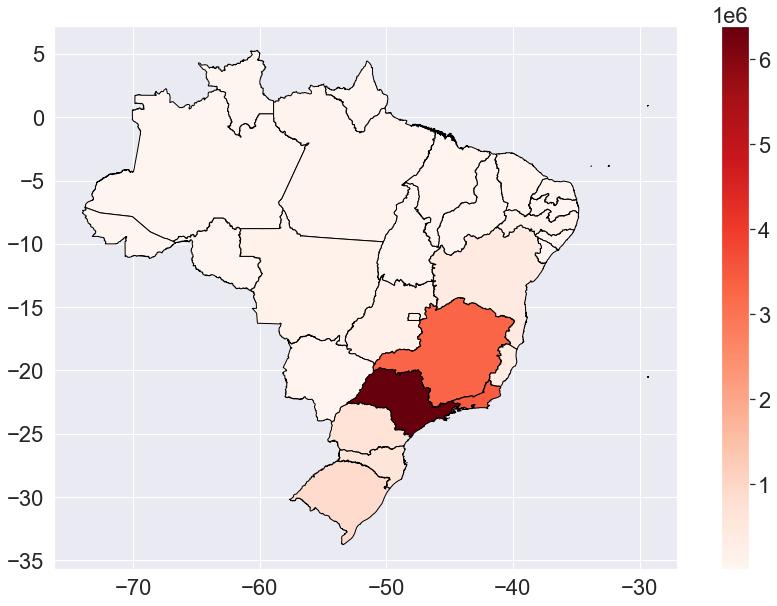

In [60]:
BRAZIL1.plot(column = ['Count'],
            cmap = 'Reds',
            figsize= (16,10),
            legend = True,
            edgecolor = 'black')

In [61]:
populationdata.pop('State')
pop_purch = pd.concat([BRAZIL1, populationdata], axis=1)
pop_purch

,State,State_Full_Name,Count,geometry,Population
0,GO,GOAIS,154963,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",7113540
1,MS,MATO GROSSO DO SUL,71107,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",2809394
2,PR,PARANÁ,716308,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",11516840
3,MG,MINAS GERAIS,3277695,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",21292666
4,SE,SERGIPE,27214,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",2318822
5,AL,ALAGOAS,36573,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",3351543
6,TO,TOCANTINS,19888,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",1590248
7,RR,RORAIMA,2411,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",631181
8,AM,AMAZONAS,6267,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",4207714
9,AC,ACRE,8332,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",894470


In [62]:
pop_purch.sort_values(['Count'],ascending= False)

,State,State_Full_Name,Count,geometry,Population
25,SP,SÃO PAULO,6396807,"MULTIPOLYGON (((-45.01051 -23.76176, -45.01624...",46289333
16,RJ,RIO DE JANEIRO,3443647,"MULTIPOLYGON (((-41.70343 -22.42014, -41.70380...",17366189
3,MG,MINAS GERAIS,3277695,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",21292666
26,RS,RIO GRANDE DO SUL,925129,"MULTIPOLYGON (((-53.03425 -27.15455, -53.03079...",11422973
2,PR,PARANÁ,716308,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",11516840
15,SC,SANTA CATARINA,625259,"MULTIPOLYGON (((-48.63761 -25.97490, -48.63504...",7252502
20,BA,BAHIA,416850,"MULTIPOLYGON (((-38.97119 -8.78270, -38.95972 ...",14930634
19,ES,ESPÍRITO SANTO,353706,"MULTIPOLYGON (((-40.47978 -17.91795, -40.46958...",4064052
0,GO,GOAIS,154963,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",7113540
21,MT,MATO GROSSO,145417,"MULTIPOLYGON (((-60.10041 -12.91271, -60.09773...",3526220


In [63]:
pop = pd.DataFrame(pop_purch['Population'])
purch = pd.DataFrame(pop_purch['Count'])

In [64]:
pop.describe()

,Population
count,2.700000e+01
mean,7.842803e+06
std,9.316952e+06
min,6.311810e+05
25%,2.932272e+06
50%,4.064052e+06
75%,9.401862e+06
max,4.628933e+07


In [65]:
purch.describe()

,Count
count,2.700000e+01
mean,6.368845e+05
std,1.450843e+06
min,2.411000e+03
25%,2.512850e+04
50%,7.149700e+04
75%,3.852780e+05
max,6.396807e+06


Now we try to look into the relationship between Population and Count.

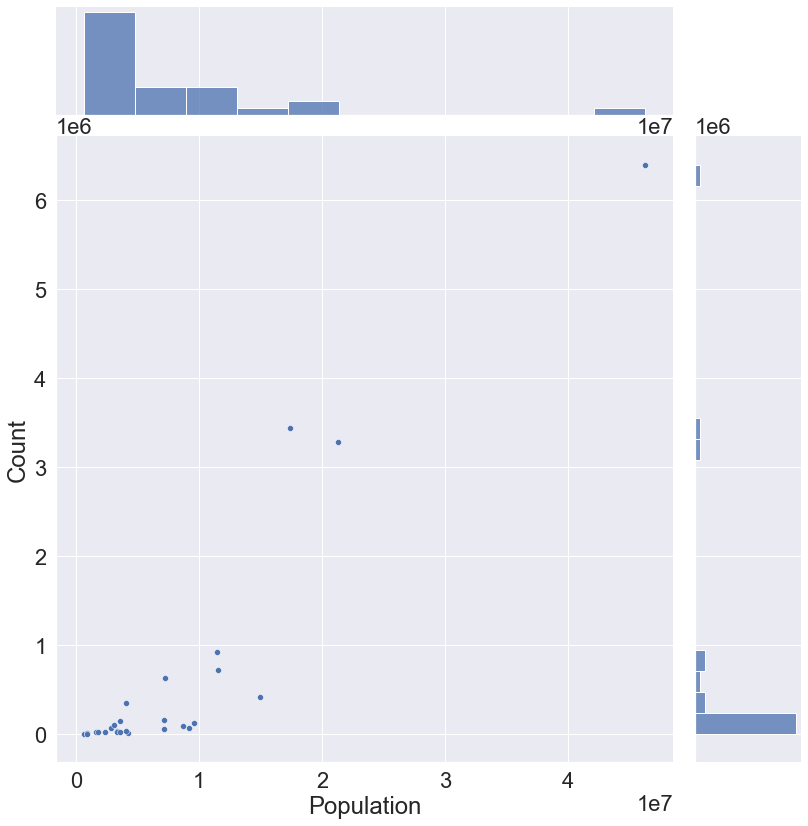

In [66]:
# Create a joint dataframe by concatenating the two variables
trainDF1 = pd.concat([pop, purch], axis = 1).reindex(pop.index)

# Jointplot of Total Train against HP Train
sns.jointplot(data = trainDF1, x = "Population", y = "Count", height = 12)

In [67]:
trainDF1.corr()

,Population,Count
Population,1.000000,0.932419
Count,0.932419,1.000000


In [68]:
pricedata = df['price']

pricedata

0           124.99
1           124.99
2           124.99
3           124.99
4           124.99
             ...  
17195876     28.96
17195877     28.96
17195878     28.96
17195879     59.90
17195880     59.90
Name: price, Length: 17195881, dtype: float64

In [69]:
state = df['geolocation_state']
state

0           SP
1           SP
2           SP
3           SP
4           SP
            ..
17195876    SP
17195877    SP
17195878    SP
17195879    PR
17195880    PR
Name: geolocation_state, Length: 17195881, dtype: object

In [70]:
state_price = pd.concat([state,pricedata],axis = 1)
state_price = pd.DataFrame(state_price)


In [71]:
state_price = state_price.groupby(['geolocation_state'], as_index=False)['price'].sum()
state_price = state_price.rename(columns = {'geolocation_state': 'State'}, inplace = False)


In [72]:
state_price = state_price.sort_values(by=["price"], ascending = False)
state_price

,State,price
25,SP,7.118387e+08
18,RJ,4.401425e+08
10,MG,3.971902e+08
22,RS,1.111831e+08
17,PR,8.539247e+07
23,SC,7.966642e+07
4,BA,6.237731e+07
7,ES,4.363488e+07
12,MT,2.277707e+07
8,GO,2.086095e+07


From the Table and the Graph below, we can observed that the top spenders of Brazil are Sao Paulo, Rio de Janeiro and Minas Gerais which are expected. 

<AxesSubplot:xlabel='price', ylabel='State'>

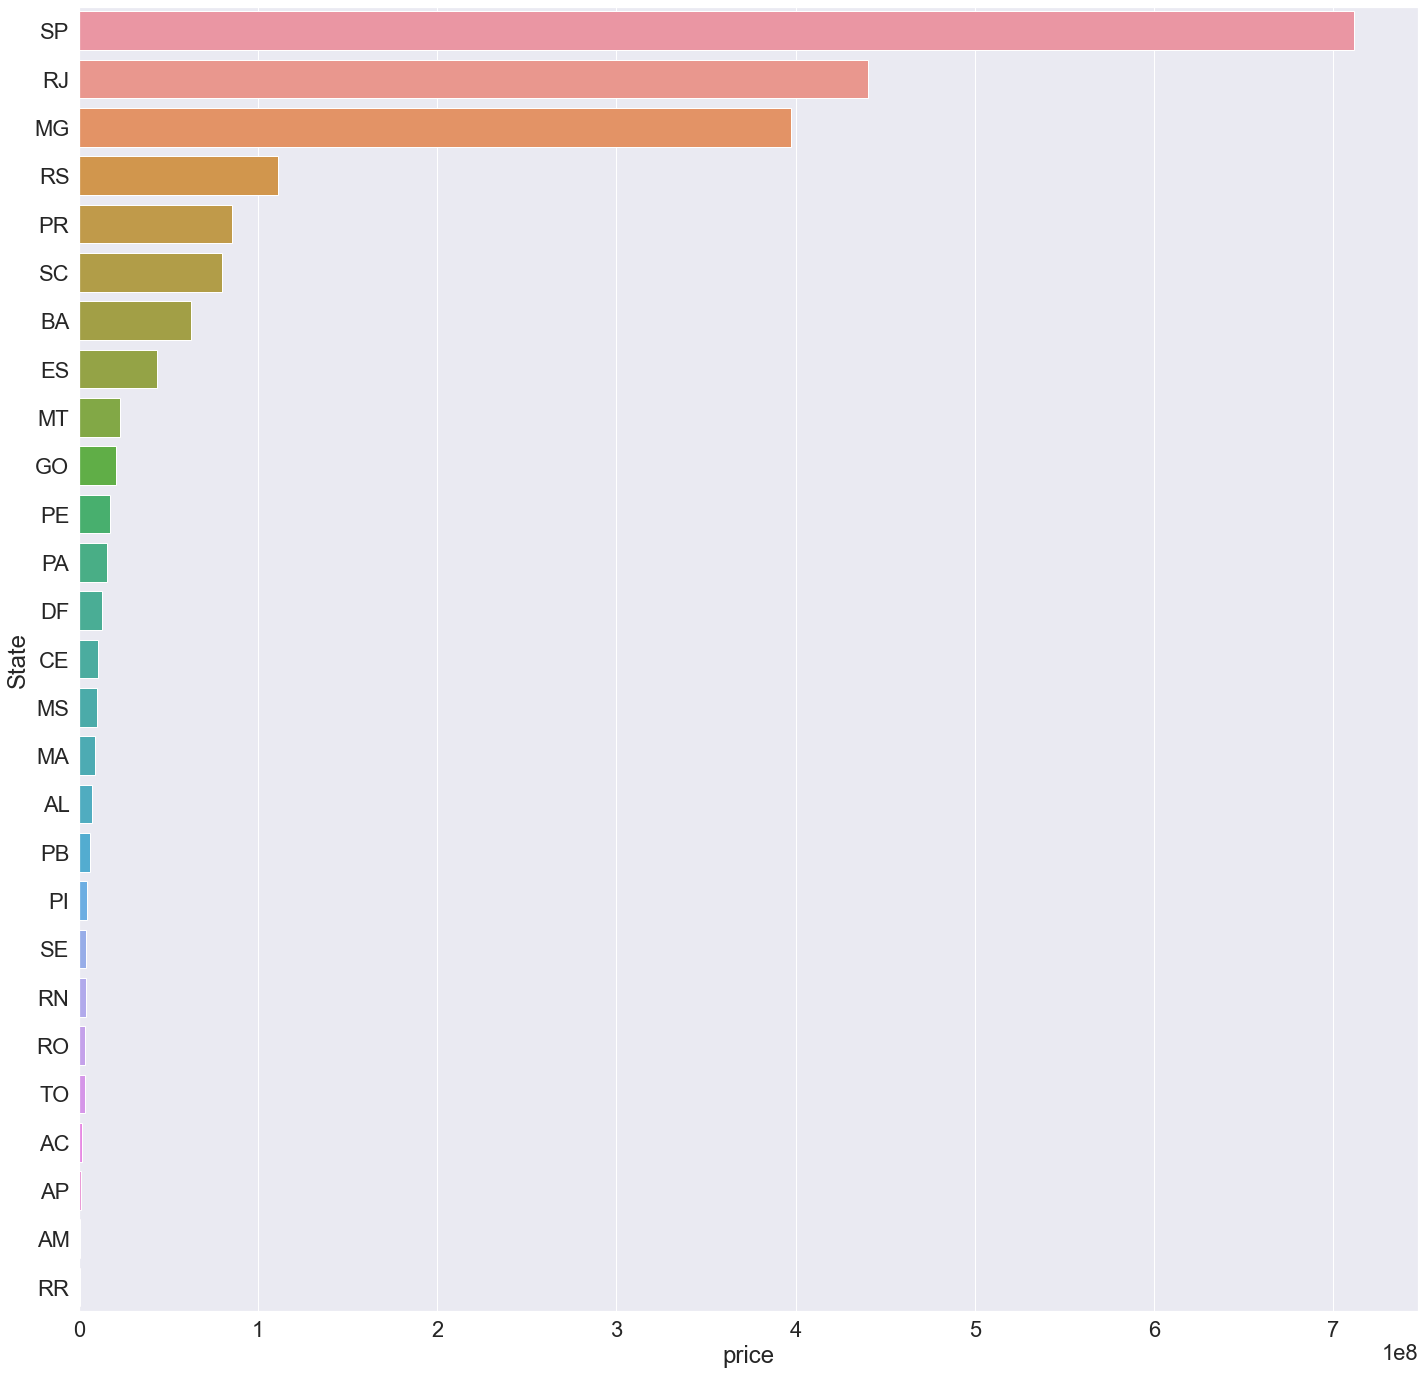

In [73]:
f = plt.figure(figsize = (24,24))
sns.set(font_scale=2)
sns.barplot(y = "State", data = state_price, x = "price")

In [74]:
state_price.describe()

,price
count,2.700000e+01
mean,7.731153e+07
std,1.676486e+08
min,3.600278e+05
25%,3.848747e+06
50%,1.081920e+07
75%,5.300610e+07
max,7.118387e+08


In [75]:
pricepop = pop_purch.merge(state_price,on='State')
pricepop = pricepop.sort_values(by='Population',ascending = False)
pricepop

,State,State_Full_Name,Count,geometry,Population,price
25,SP,SÃO PAULO,6396807,"MULTIPOLYGON (((-45.01051 -23.76176, -45.01624...",46289333,7.118387e+08
3,MG,MINAS GERAIS,3277695,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",21292666,3.971902e+08
16,RJ,RIO DE JANEIRO,3443647,"MULTIPOLYGON (((-41.70343 -22.42014, -41.70380...",17366189,4.401425e+08
20,BA,BAHIA,416850,"MULTIPOLYGON (((-38.97119 -8.78270, -38.95972 ...",14930634,6.237731e+07
2,PR,PARANÁ,716308,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",11516840,8.539247e+07
26,RS,RIO GRANDE DO SUL,925129,"MULTIPOLYGON (((-53.03425 -27.15455, -53.03079...",11422973,1.111831e+08
22,PE,PERNAMBUCO,127671,"MULTIPOLYGON (((-32.38846 -3.81629, -32.39054 ...",9616621,1.754507e+07
14,CE,CEARÁ,71497,"MULTIPOLYGON (((-40.42389 -2.81130, -40.41525 ...",9187103,1.081920e+07
18,PA,PARÁ,93342,"MULTIPOLYGON (((-46.25020 -1.13999, -46.25285 ...",8690745,1.558618e+07
15,SC,SANTA CATARINA,625259,"MULTIPOLYGON (((-48.63761 -25.97490, -48.63504...",7252502,7.966642e+07


In [76]:
pricepop.drop(['geometry'], axis='columns', inplace=True)
pricepop = pricepop.sort_values(by='price',ascending = False)
pricepop

,State,State_Full_Name,Count,Population,price
25,SP,SÃO PAULO,6396807,46289333,7.118387e+08
16,RJ,RIO DE JANEIRO,3443647,17366189,4.401425e+08
3,MG,MINAS GERAIS,3277695,21292666,3.971902e+08
26,RS,RIO GRANDE DO SUL,925129,11422973,1.111831e+08
2,PR,PARANÁ,716308,11516840,8.539247e+07
15,SC,SANTA CATARINA,625259,7252502,7.966642e+07
20,BA,BAHIA,416850,14930634,6.237731e+07
19,ES,ESPÍRITO SANTO,353706,4064052,4.363488e+07
21,MT,MATO GROSSO,145417,3526220,2.277707e+07
0,GO,GOAIS,154963,7113540,2.086095e+07


In [77]:
pricepop.sort_values(by = 'Population',ascending = False)
price = pricepop['price']
population = pricepop['Population']
purch = pricepop['Count']
pricepop

,State,State_Full_Name,Count,Population,price
25,SP,SÃO PAULO,6396807,46289333,7.118387e+08
16,RJ,RIO DE JANEIRO,3443647,17366189,4.401425e+08
3,MG,MINAS GERAIS,3277695,21292666,3.971902e+08
26,RS,RIO GRANDE DO SUL,925129,11422973,1.111831e+08
2,PR,PARANÁ,716308,11516840,8.539247e+07
15,SC,SANTA CATARINA,625259,7252502,7.966642e+07
20,BA,BAHIA,416850,14930634,6.237731e+07
19,ES,ESPÍRITO SANTO,353706,4064052,4.363488e+07
21,MT,MATO GROSSO,145417,3526220,2.277707e+07
0,GO,GOAIS,154963,7113540,2.086095e+07


In [78]:
pricevspop = pd.concat([price,population],axis = 1).reindex(population.index)

pricevspop.corr()

,price,Population
price,1.000000,0.923119
Population,0.923119,1.000000


We observed yet again that the there is a positive linear relationship in the Population vs Price in the states of Brazil. When there is higher population in a state, it is expected to see a rise in the total price purchased.

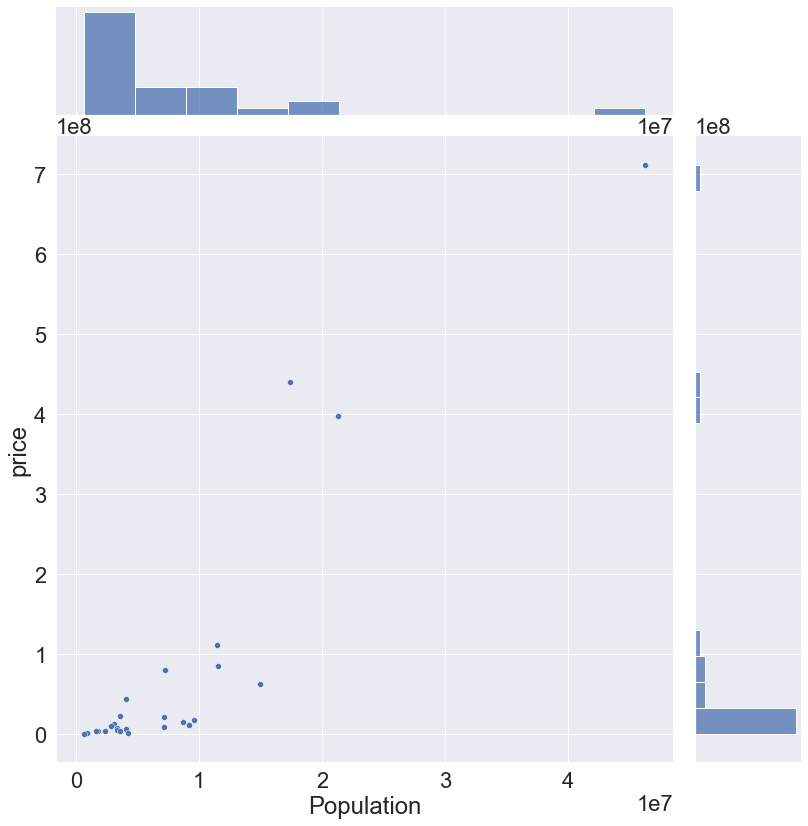

In [79]:
sns.jointplot(data = pricevspop, x = "Population", y = "price", height = 12)

Now we want to see do the number of purchases make actually corresponds to the price of the purchase? 
E.g Does higher number of purchase mean higher total cost?

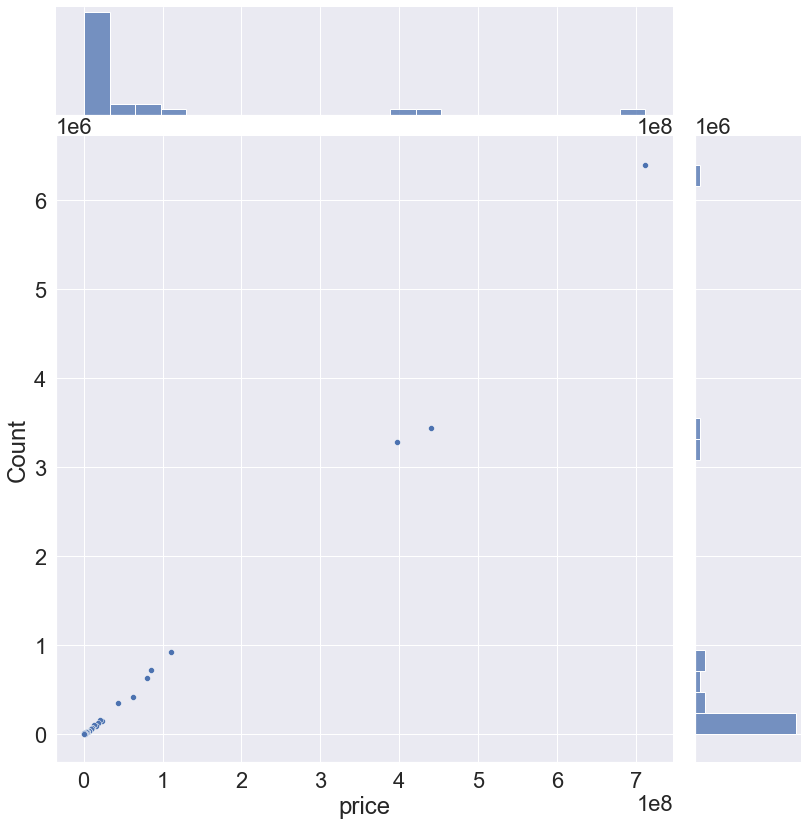

In [80]:
purchvsprice = pd.concat([price,purch],axis = 1).reindex(purch.index)
sns.jointplot(data = purchvsprice, x = "price", y = "Count", height = 12)

In [81]:
purchvsprice.corr()

,price,Count
price,1.000000,0.998017
Count,0.998017,1.000000


And yes! It is definitely true that with a higher number of purchase in a state, the total cost increases. Therefore it is likely that the average spending of products among each states are likely similar. Although there might be products which could be very costly or products that could be very cheap that is being purchased and such cases for Example in Para and in Distrito Federal where the number of purchases made in Para was lower than Distrito Federal and yet the total price was higher.

In [82]:
pricepop['AvgSpend'] = pricepop['price']/pricepop['Count']

In [83]:
pricepop.sort_values(by = 'AvgSpend', ascending= False)

,State,State_Full_Name,Count,Population,price,AvgSpend
13,PB,PARAÍBA,31573,4039277,6.278650e+06,198.861377
5,AL,ALAGOAS,36573,3351543,7.191886e+06,196.644686
9,AC,ACRE,8332,894470,1.494038e+06,179.313218
17,AP,AMAPÁ,5582,861773,9.885786e+05,177.101152
12,PI,PIAUÍ,26490,3281480,4.581195e+06,172.940545
6,TO,TOCANTINS,19888,1590248,3.350329e+06,168.459841
18,PA,PARÁ,93342,8690745,1.558618e+07,166.979282
23,RN,RIO GRANDE DO NORTE,23212,3534165,3.721309e+06,160.318325
21,MT,MATO GROSSO,145417,3526220,2.277707e+07,156.632806
14,CE,CEARÁ,71497,9187103,1.081920e+07,151.323857


Now we see that the Average Spending in each states are different and the state with the most number of purchase do not have the highest average spendings. Instead, Paraiba has the highest average spending of $198.86.

In [84]:
avgspend=pricepop['AvgSpend']

In [85]:
avgvspurch = pd.concat([avgspend,purch],axis = 1).reindex(purch.index)

In [86]:
avgvspurch.corr()

,AvgSpend,Count
AvgSpend,1.000000,-0.507495
Count,-0.507495,1.000000


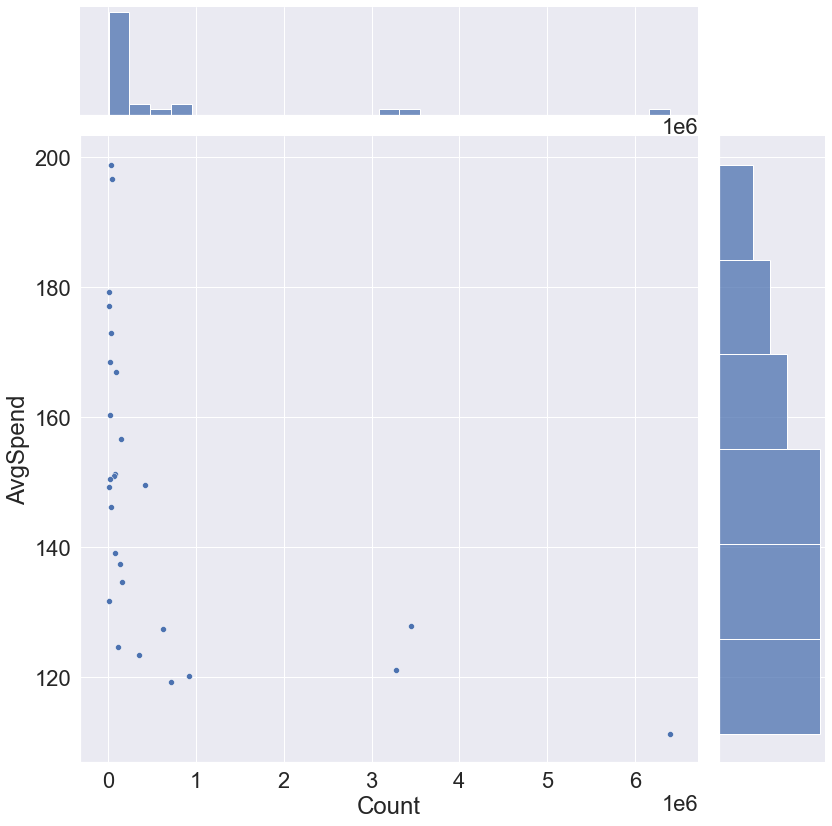

In [87]:
sns.jointplot(data=avgvspurch,x='Count',y='AvgSpend',height = 12)

There seem to be a moderate negaitve correlation between the Average spending in a state and the number of purchases made. Higher average spending in a state is likely to meant a lower number of purchase in a state.